<a href="https://colab.research.google.com/github/Abisri09/DL-ASS/blob/main/DL_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**





In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

**Load the Dataset**

In [2]:
data=pd.read_csv("/content/29-indicator_esd_16.csv")

**Basic Info and Summary Statistics**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 28 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Sector                                                                           24 non-null     object 
 1   Nature of Operation                                                              24 non-null     object 
 2   01 - Activities relating to agriculture other than crop production & plantation  24 non-null     float64
 3   02 - Livestock                                                                   24 non-null     float64
 4   03 - Forestry and Logging                                                        24 non-null     float64
 5   04 - Fishing and aqua culture                                                    24 non-null     float64
 6   Subtotal : A

In [4]:
data.describe()

,01 - Activities relating to agriculture other than crop production & plantation,02 - Livestock,03 - Forestry and Logging,04 - Fishing and aqua culture,Subtotal : Agricultural Activities,05 - Mining and quarrying,06 - Manufacturing,"07 - Electricity, gas, steam and air conditioning supply","08 - Water supply, sewerage, waste management and remediation activities",09 - Construction,...,16 - Financial and insurance activities,17 - Real estate activities,"18 - Professional, scientific & technical activities",19 - Administrative and support service activities,20 - Education,21 - Human health & social work activities,"22 - Arts entertainment, sports & amusement and recreation",23 - Other service activities not else where classified,Subtotal : Non-AriculturalActivities,Total
count,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,24.000000,2.400000e+01,24.000000,24.000000,2.400000e+01,...,2.400000e+01,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,2.400000e+01,2.400000e+01
mean,2.269630e+05,3.236432e+06,2.041598e+05,146295.333333,3.813775e+06,92937.333333,5.059570e+06,90732.004167,69676.666667,3.883740e+05,...,4.730620e+05,117101.833333,2.641560e+05,3.448325e+05,1.766084e+06,5.829507e+05,102484.675000,1.160670e+06,1.806859e+07,2.188234e+07
std,4.090825e+05,6.693806e+06,3.919147e+05,266142.516403,7.620929e+06,174525.880669,9.272408e+06,172380.134580,131153.405498,7.080444e+05,...,9.056331e+05,235932.451228,5.356618e+05,6.488975e+05,3.392805e+06,1.122242e+06,182241.953983,2.172464e+06,3.373041e+07,4.020188e+07
min,8.000000e-01,1.200000e+00,2.100000e+00,0.800000,1.200000e+00,0.900000,5.000000e-01,0.200000,0.600000,1.800000e+00,...,4.000000e-01,1.700000,3.000000e-01,6.000000e-01,2.000000e-01,3.000000e-01,2.100000,8.000000e-01,5.000000e-01,5.000000e-01
25%,5.312500e+01,6.980000e+01,5.955000e+01,64.925000,6.682500e+01,69.225000,6.857500e+01,74.100000,70.475000,6.817500e+01,...,7.365000e+01,70.850000,7.262500e+01,6.770000e+01,7.422500e+01,7.412500e+01,65.375000,7.260000e+01,7.120000e+01,6.982500e+01
50%,5.580000e+02,8.909000e+03,6.415000e+02,838.000000,1.079650e+04,739.000000,4.577800e+04,285.500000,805.500000,1.210500e+04,...,3.548500e+03,1893.000000,1.269500e+03,4.493500e+03,6.636000e+03,3.192500e+03,3717.500000,1.458300e+04,1.595420e+05,1.702885e+05
75%,2.253712e+05,1.458484e+06,1.115028e+05,154911.750000,2.125422e+06,71762.000000,4.432508e+06,64053.000000,48052.250000,3.261045e+05,...,2.873138e+05,42277.000000,9.487575e+04,2.381102e+05,1.059274e+06,3.381625e+05,97886.250000,9.370825e+05,1.389809e+07,2.068860e+07
max,1.361628e+06,1.941844e+07,1.224809e+06,877622.000000,2.288250e+07,557474.000000,3.035727e+07,544242.000000,417910.000000,2.330094e+06,...,2.838222e+06,702461.000000,1.584786e+06,2.068845e+06,1.059635e+07,3.497554e+06,614758.000000,6.963872e+06,1.084114e+08,1.312939e+08


In [5]:
data.head(10)

,Sector,Nature of Operation,01 - Activities relating to agriculture other than crop production & plantation,02 - Livestock,03 - Forestry and Logging,04 - Fishing and aqua culture,Subtotal : Agricultural Activities,05 - Mining and quarrying,06 - Manufacturing,"07 - Electricity, gas, steam and air conditioning supply",...,16 - Financial and insurance activities,17 - Real estate activities,"18 - Professional, scientific & technical activities",19 - Administrative and support service activities,20 - Education,21 - Human health & social work activities,"22 - Arts entertainment, sports & amusement and recreation",23 - Other service activities not else where classified,Subtotal : Non-AriculturalActivities,Total
0,Rural,1 - Perinnial,702799.0,16224731.0,273697.0,541861.0,17743088.0,359950.0,11975215.0,238563.0,...,1060530.0,122662.0,307884.0,595477.0,6545663.0,1279384.0,217431.0,3296176.0,43503083.0,61246171.0
1,Rural,1 - Perinnial,57.1,90.2,23.4,80.6,84.3,88.9,87.8,98.3,...,97.7,93.1,95.6,86.2,98.8,98.5,82.9,95.9,92.9,90.2
2,Rural,2 - Seasonal,507159.0,1540959.0,857435.0,120592.0,3026145.0,41336.0,1482813.0,3593.0,...,16800.0,5418.0,11871.0,84571.0,64616.0,13536.0,33523.0,92903.0,2876775.0,5902920.0
3,Rural,3 - Seasonal,41.2,8.6,73.5,17.9,14.4,10.2,10.9,1.5,...,1.5,4.1,3.7,12.2,1.0,1.0,12.8,2.7,6.1,8.7
4,Rural,9 - Casual,20228.0,221760.0,36239.0,9860.0,288087.0,3670.0,184445.0,537.0,...,8561.0,3686.0,2439.0,11120.0,13172.0,6285.0,11443.0,47073.0,458243.0,746330.0
5,Rural,10 - Casual,1.6,1.2,3.1,1.5,1.4,0.9,1.4,0.2,...,0.8,2.8,0.8,1.6,0.2,0.5,4.4,1.4,1.0,1.1
6,Rural,Total,1230186.0,17987450.0,1167371.0,672313.0,21057320.0,404956.0,13642473.0,242693.0,...,1085891.0,131766.0,322194.0,691168.0,6623451.0,1299205.0,262397.0,3436152.0,46838101.0,67895421.0
7,Rural,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,Urban,1 - Perinnial,106101.0,1358196.0,49224.0,176664.0,1690185.0,145190.0,16187885.0,298788.0,...,1732559.0,550898.0,1246334.0,1334373.0,3917071.0,2181021.0,320511.0,3440839.0,60101295.0,61791480.0
9,Urban,2 - Perinnial,80.7,94.9,85.7,86.0,92.6,95.2,96.8,99.1,...,98.9,96.5,98.7,96.9,98.6,99.2,91.0,97.5,97.6,97.5


** Separate features and target variable**

In [6]:
X = data.drop(columns=['Total'])
y = data['Total']

**Define categorical and numerical columns**

In [7]:
categorical_cols = ['Sector', 'Nature of Operation']
numerical_cols = X.columns.difference(categorical_cols)

**Data Preprocessing**

**Categorical columns and Numerical columns**

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding categorical features
    ])

In [9]:
data.head(1)

,Sector,Nature of Operation,01 - Activities relating to agriculture other than crop production & plantation,02 - Livestock,03 - Forestry and Logging,04 - Fishing and aqua culture,Subtotal : Agricultural Activities,05 - Mining and quarrying,06 - Manufacturing,"07 - Electricity, gas, steam and air conditioning supply",...,16 - Financial and insurance activities,17 - Real estate activities,"18 - Professional, scientific & technical activities",19 - Administrative and support service activities,20 - Education,21 - Human health & social work activities,"22 - Arts entertainment, sports & amusement and recreation",23 - Other service activities not else where classified,Subtotal : Non-AriculturalActivities,Total
0,Rural,1 - Perinnial,702799.0,16224731.0,273697.0,541861.0,17743088.0,359950.0,11975215.0,238563.0,...,1060530.0,122662.0,307884.0,595477.0,6545663.0,1279384.0,217431.0,3296176.0,43503083.0,61246171.0


In [10]:
columns_to_scale = [
    '01 - Activities relating to agriculture other than crop production & plantation',
    '02 - Livestock',
    '03 - Forestry and Logging',
    '04 - Fishing and aqua culture',
    'Subtotal : Agricultural Activities',
    '05 - Mining and quarrying',
    '06 - Manufacturing',
    '07 - Electricity, gas, steam and air conditioning supply',
    '08 - Water supply, sewerage, waste management and remediation activities',
    '09 - Construction',
    '10 - Wholesale trade, retail trade & repair of motor vehicles & motor cycles',
    '11 - Wholesale trade (not covered in item-10 above)',
    '12 - Retail trade (not covered in item-10 above)',
    '13 - Transportation and storage',
    '14 - Accommodation and Food service activities',
    '15 - Information & communication',
    '16 - Financial and insurance activities',
    '17 - Real estate activities',
    '18 - Professional, scientific & technical activities',
    '19 - Administrative and support service activities',
    '20 - Education',
    '21 - Human health & social work activities',
    '22 - Arts entertainment, sports & amusement and recreation',
    '23 - Other service activities not elsewhere classified',
    'Subtotal : Non-Agricultural Activities',
    'Total'
]

In [11]:
# Check for missing columns before applying transformations
missing_columns = [col for col in columns_to_scale if col not in data.columns]
if missing_columns:
    # Instead of raising an error, handle the missing columns (e.g., add them with default values)
    for col in missing_columns:
        data[col] = 0  # Or another suitable default value

# Continue with your preprocessing steps
preprocessor = ColumnTransformer(
transformers=[
    ('num', StandardScaler(), columns_to_scale),
    ('cat', OneHotEncoder(), categorical_cols)
])

In [12]:
scaler = StandardScaler()  # or use MinMaxScaler()

# Apply scaling only to the selected numeric columns
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


**Check for missing values**

In [13]:
print(data.isnull().sum())

Sector                                                                             0
Nature of Operation                                                                0
01 - Activities relating to agriculture other than crop production & plantation    0
02 - Livestock                                                                     0
03 - Forestry and Logging                                                          0
04 - Fishing and aqua culture                                                      0
Subtotal : Agricultural Activities                                                 0
05 - Mining and quarrying                                                          0
06 - Manufacturing                                                                 0
07 - Electricity, gas, steam and air conditioning supply                           0
08 - Water supply, sewerage, waste management and remediation activities           0
09 - Construction                                                

In [14]:
encoder = OneHotEncoder(sparse=False, drop='first')  # Avoid dummy variable trap
encoded_features = encoder.fit_transform(data[['Sector', 'Nature of Operation']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sector', 'Nature of Operation']))


In [16]:
data = pd.concat([data.drop(['Sector', 'Nature of Operation'], axis=1), encoded_data], axis=1)

In [17]:
features = data.drop('Total', axis=1)
target = data['Total']

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
features = pd.DataFrame(scaled_features, columns=features.columns)

**Univariate Analysis**

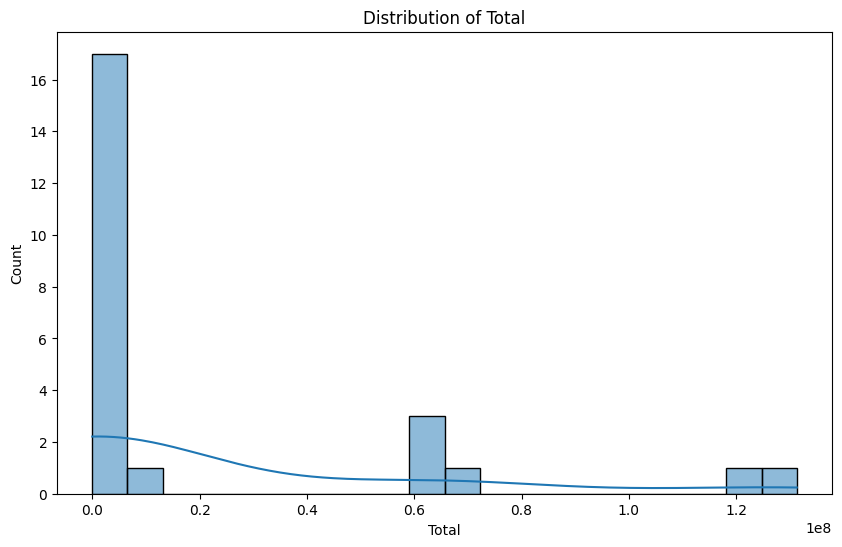

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=20, kde=True)
plt.title('Distribution of Total')
plt.show()

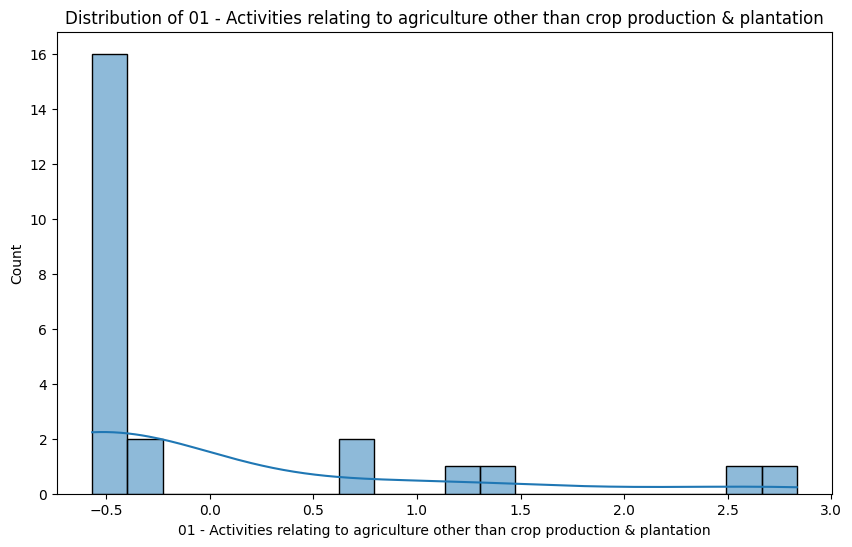

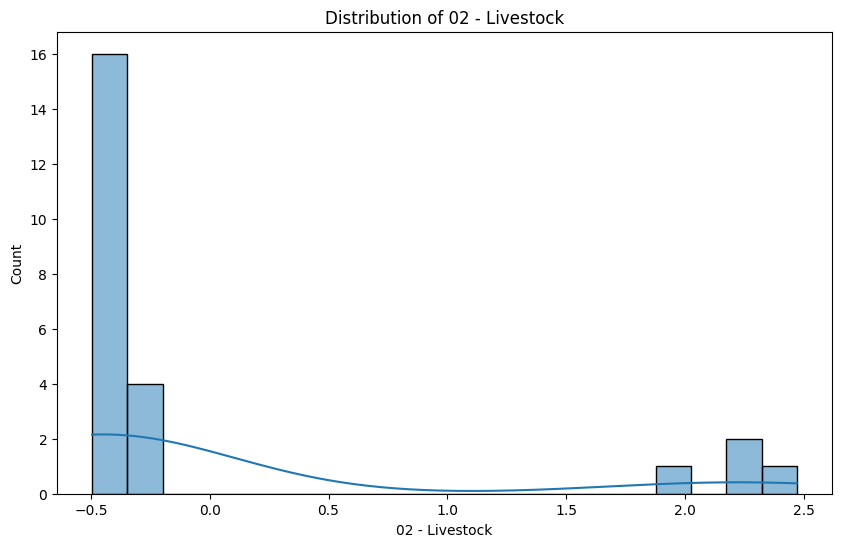

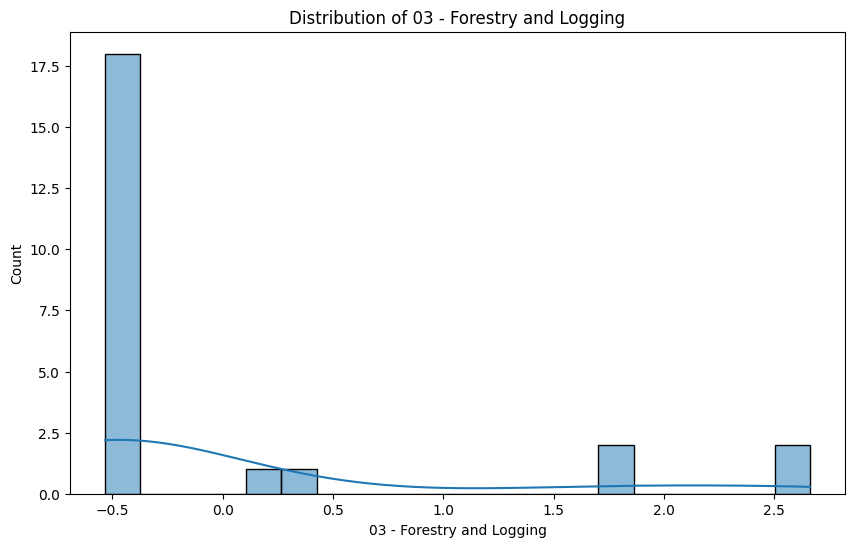

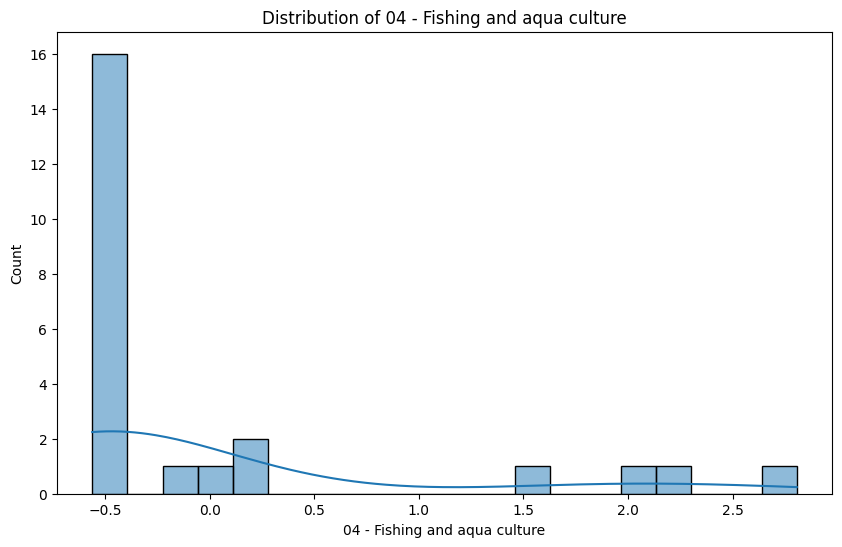

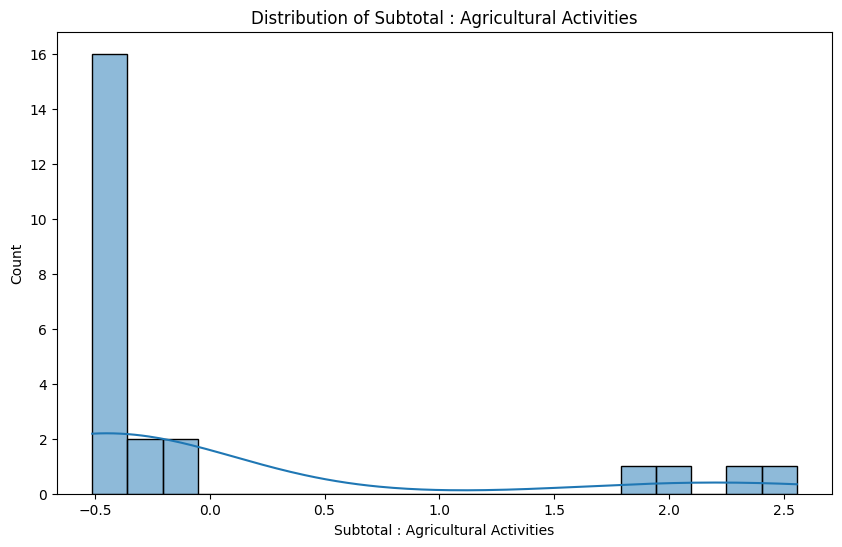

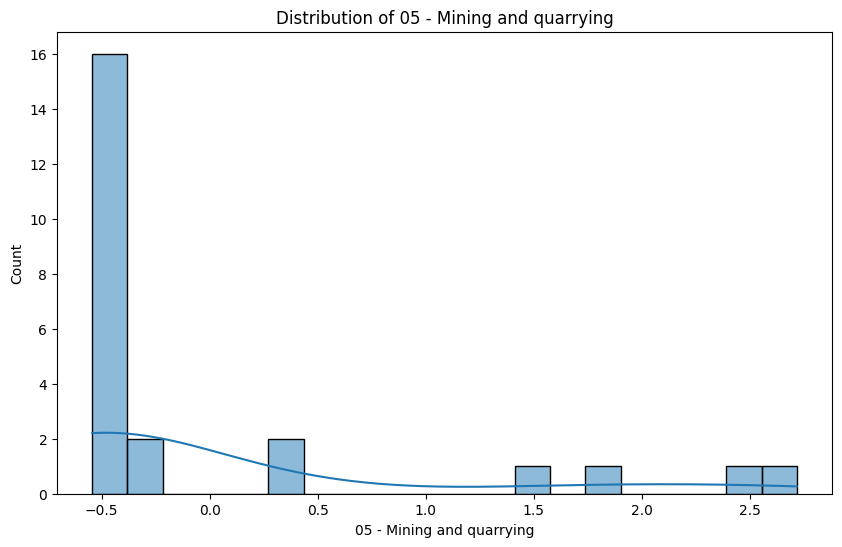

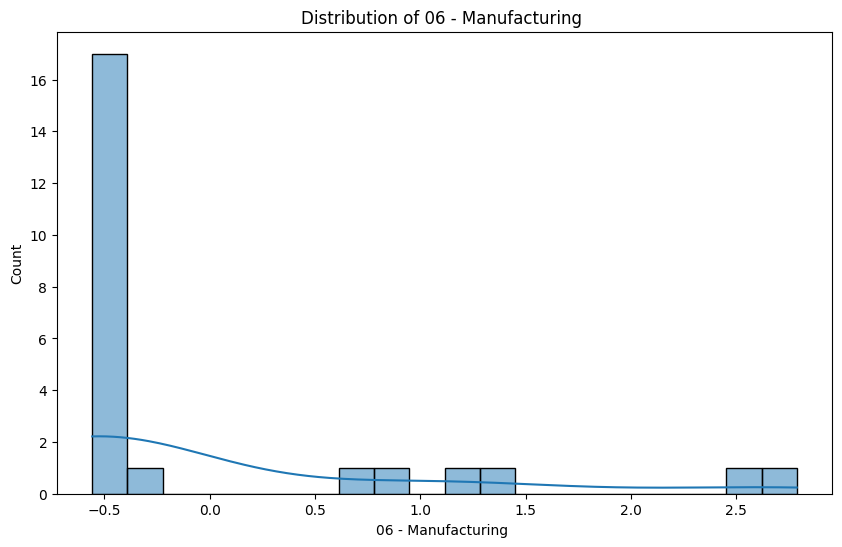

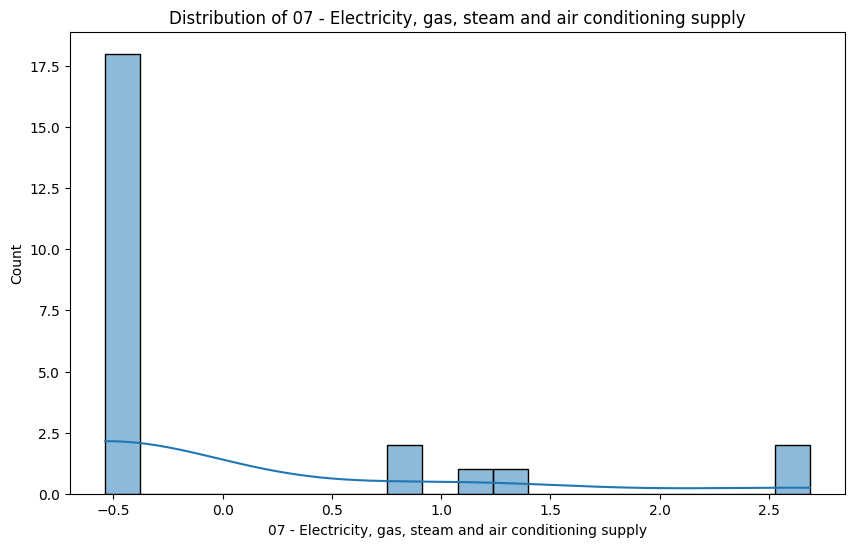

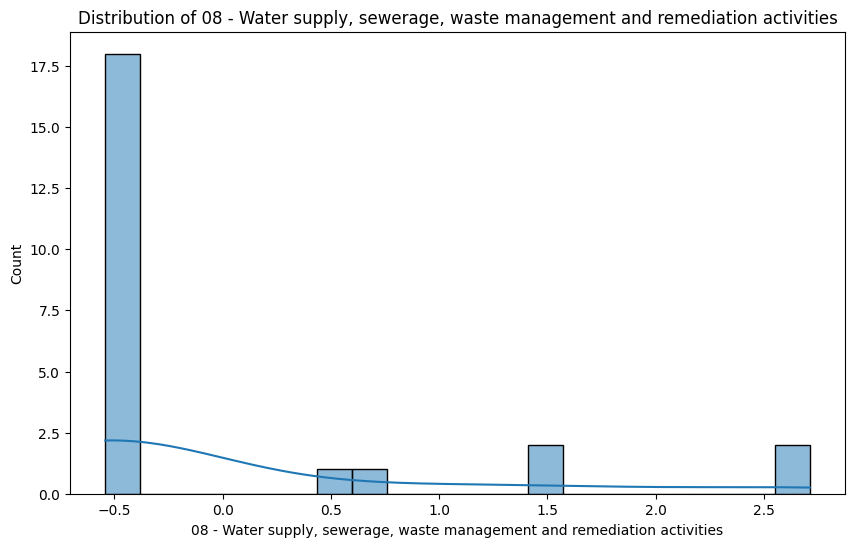

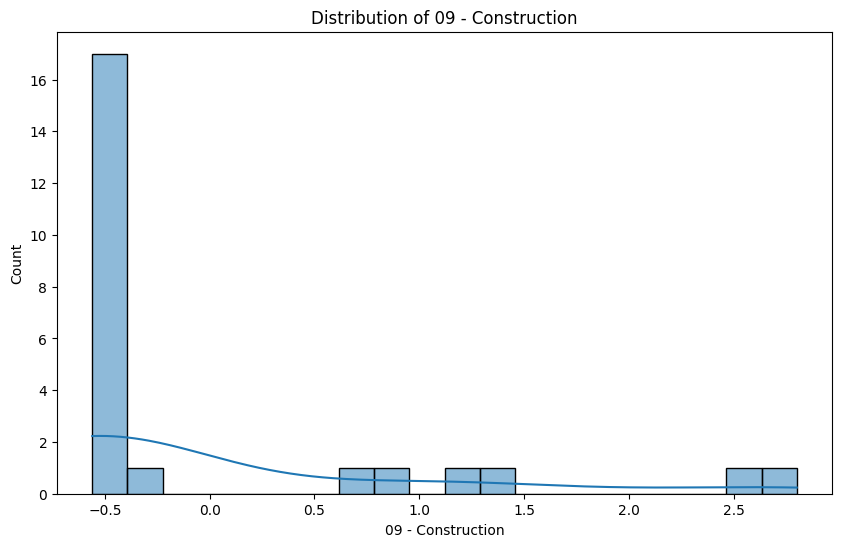

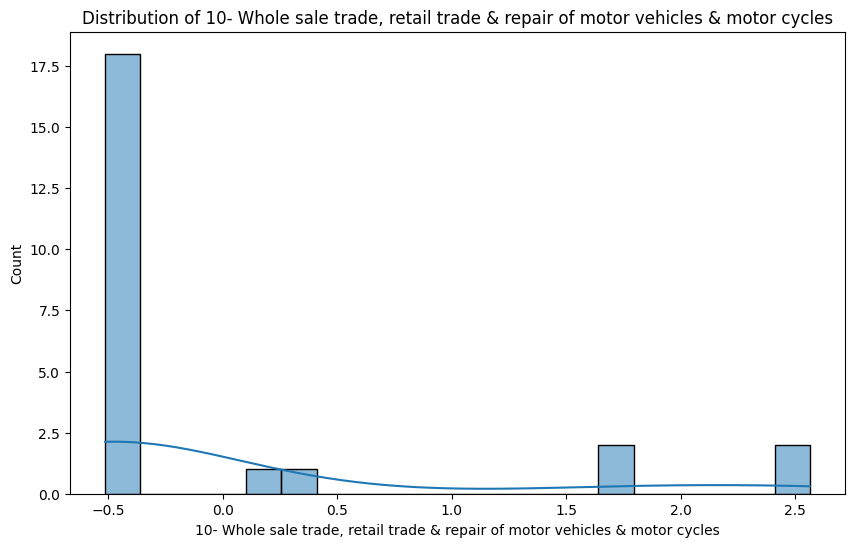

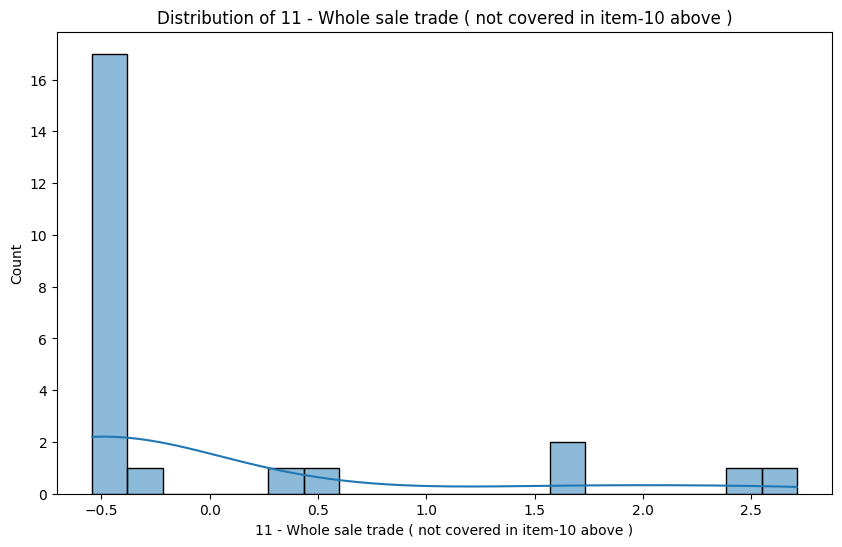

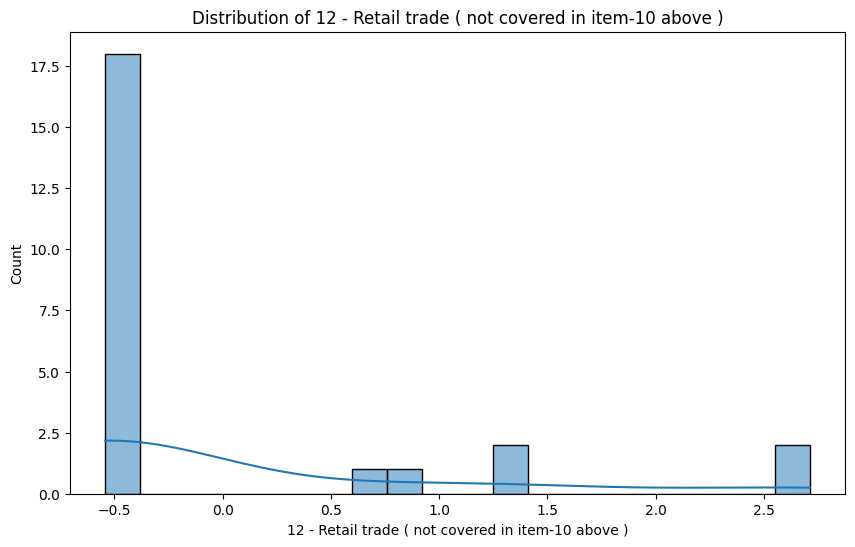

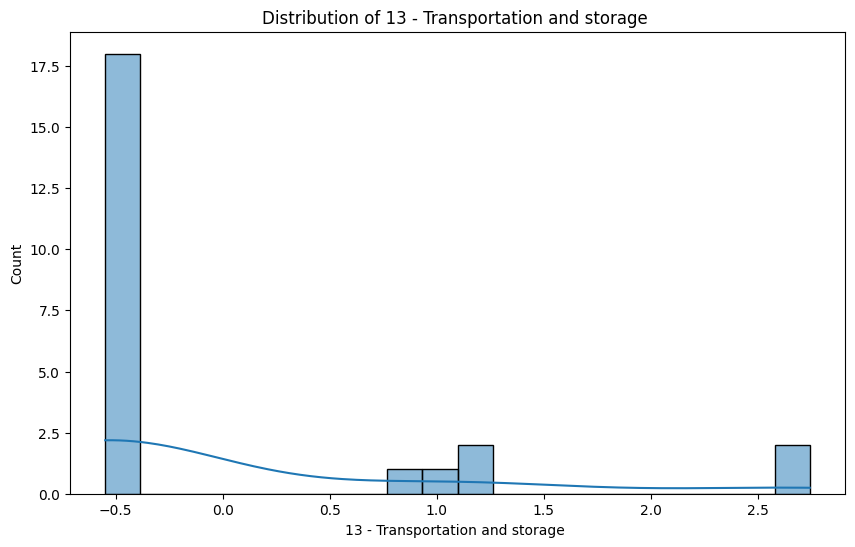

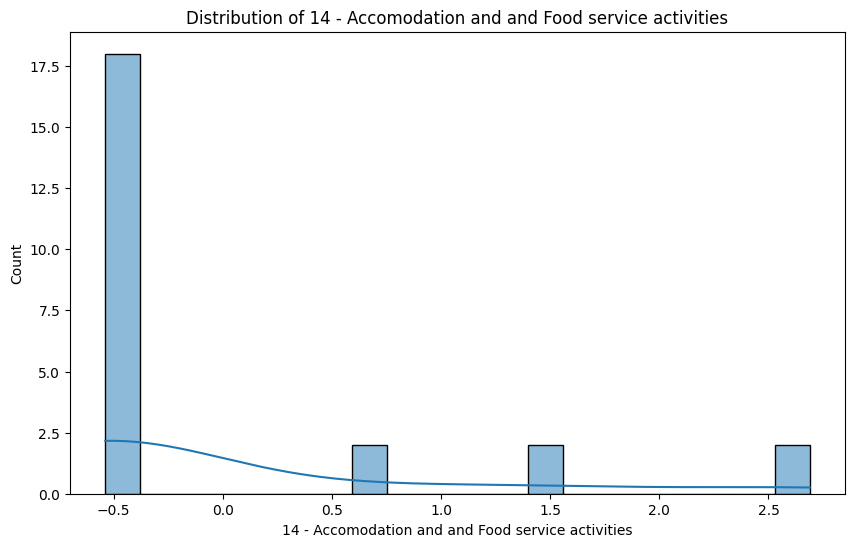

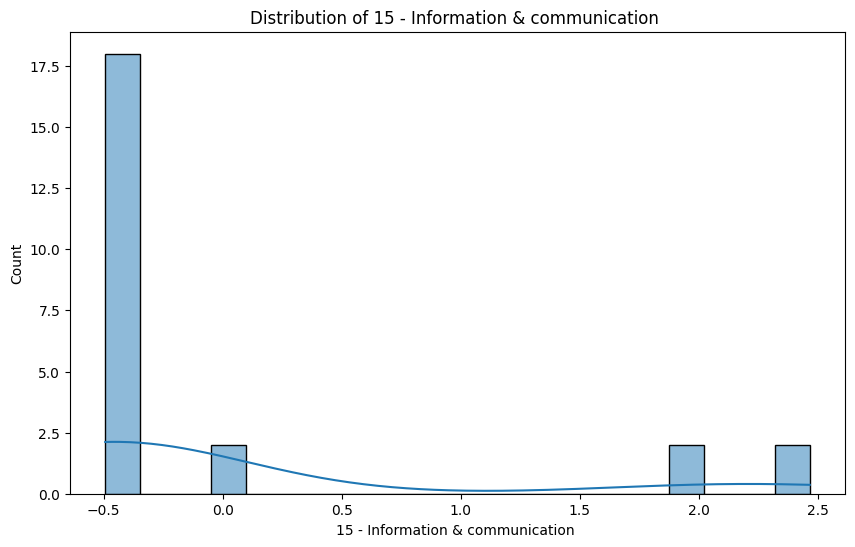

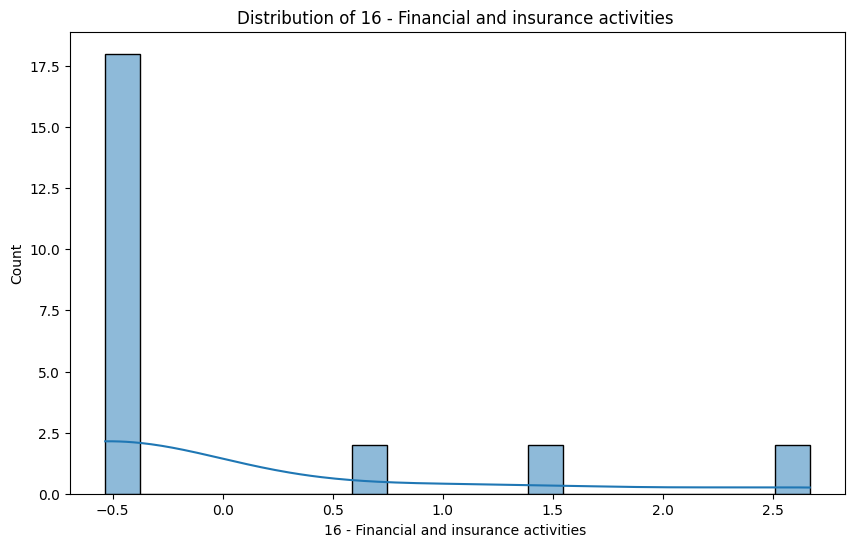

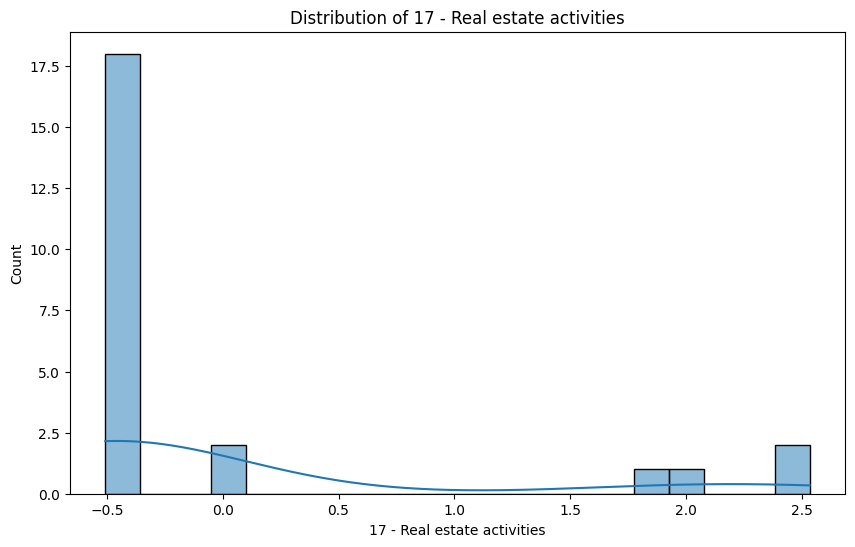

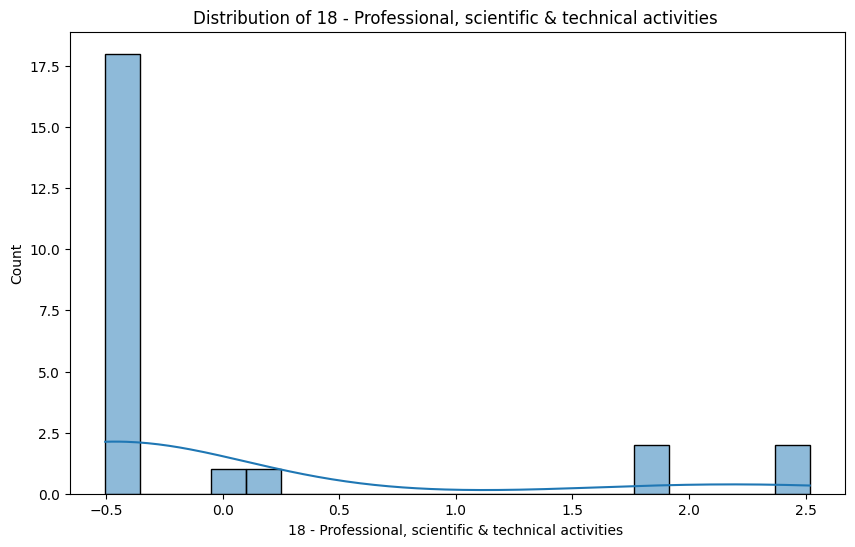

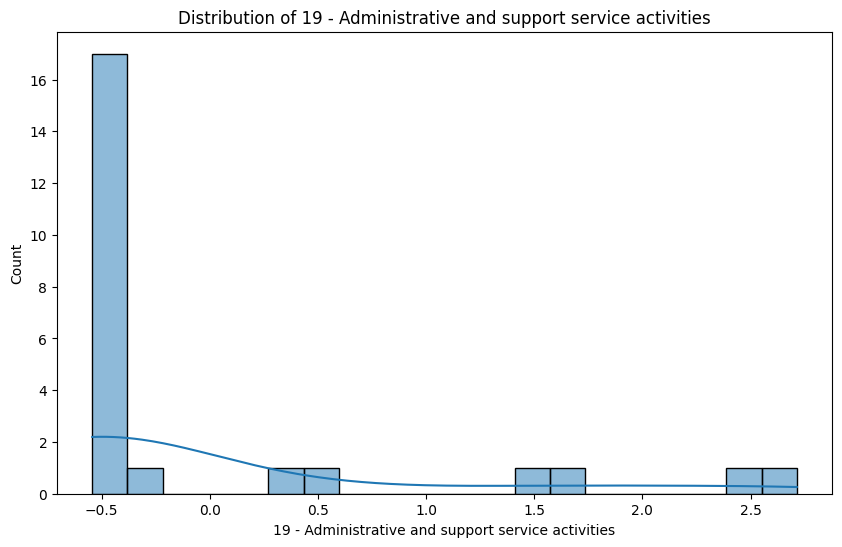

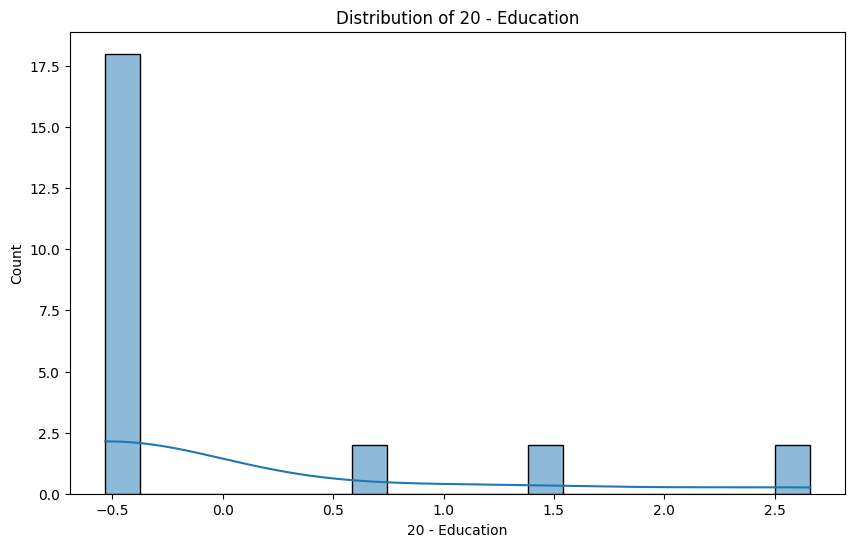

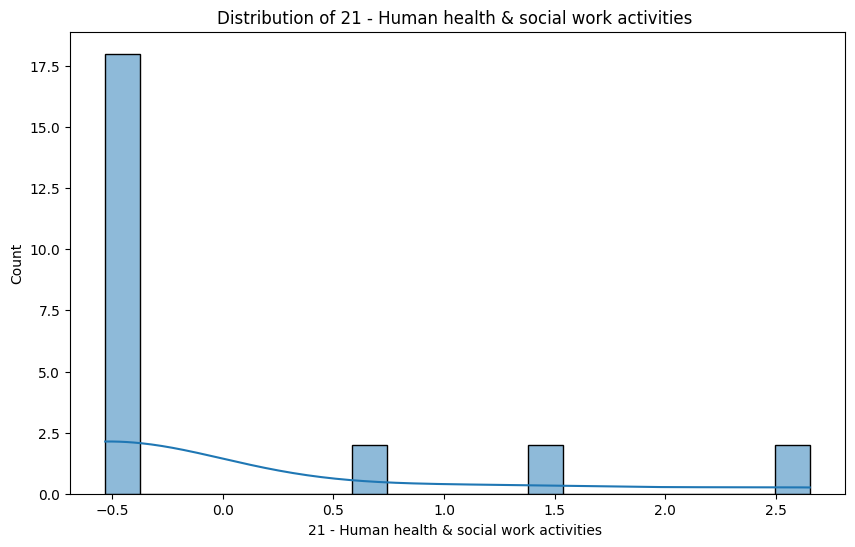

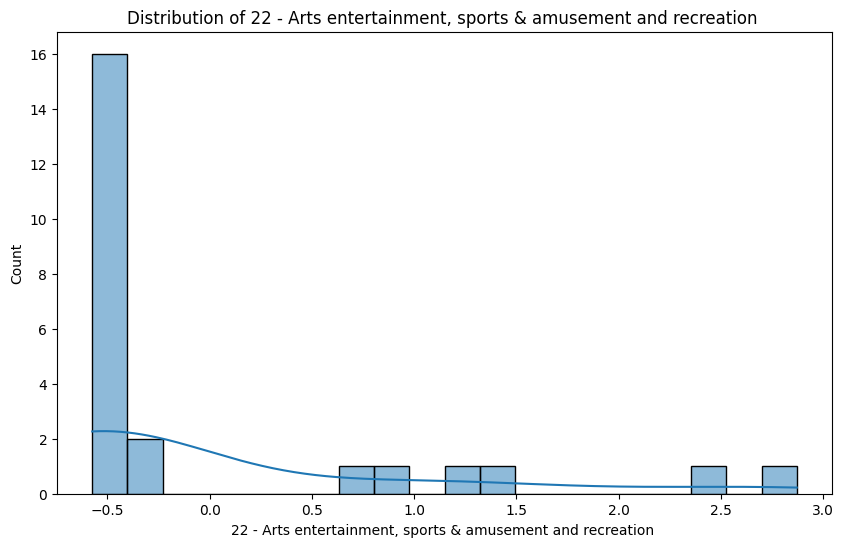

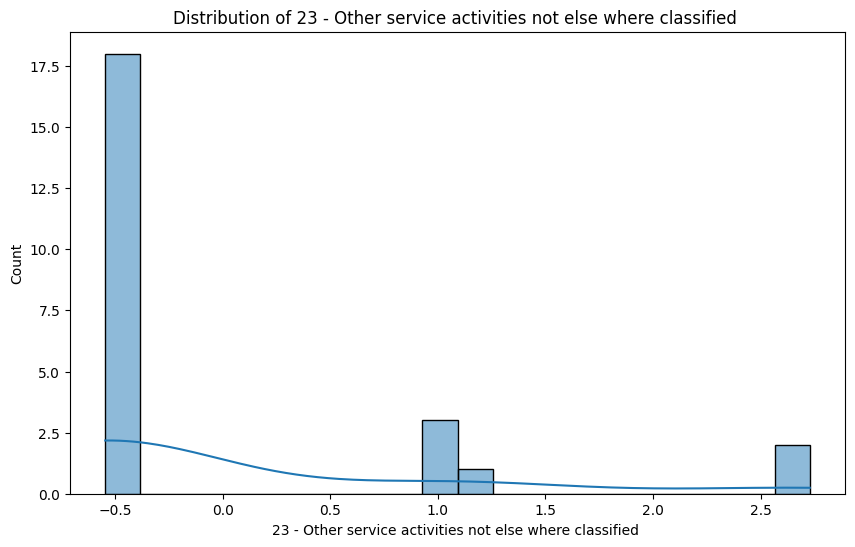

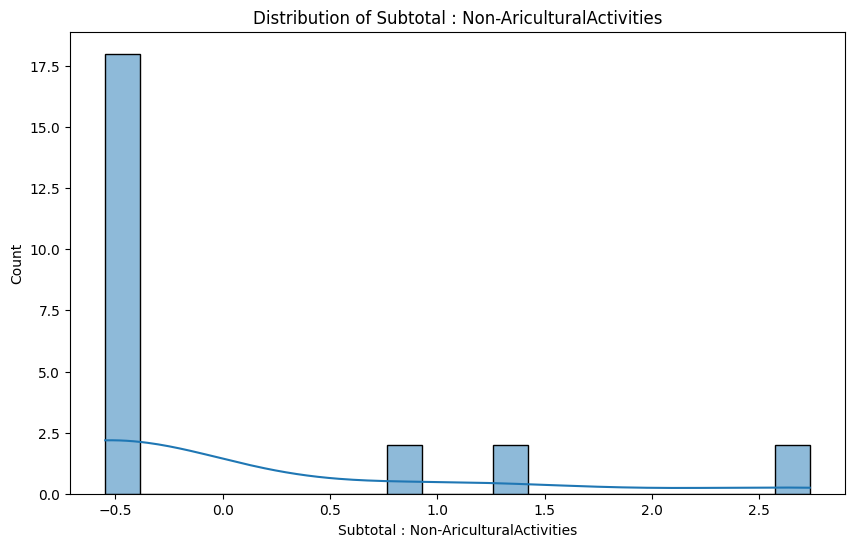

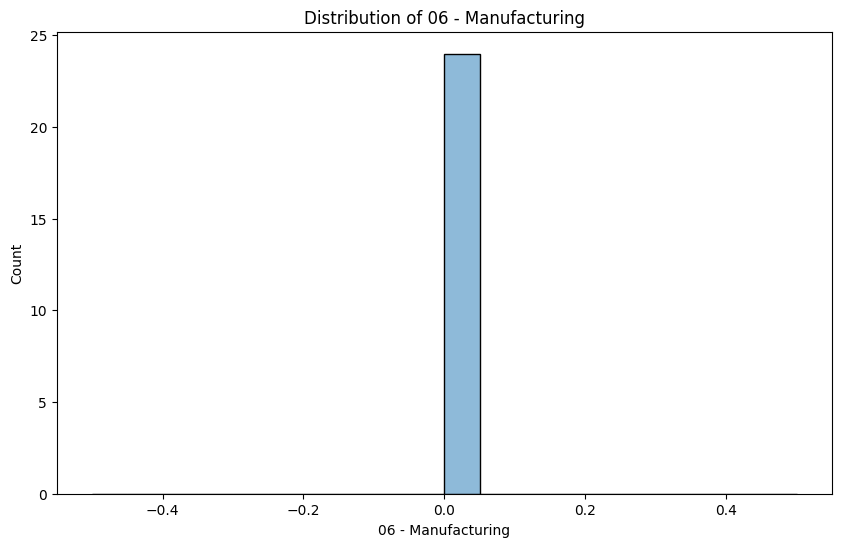

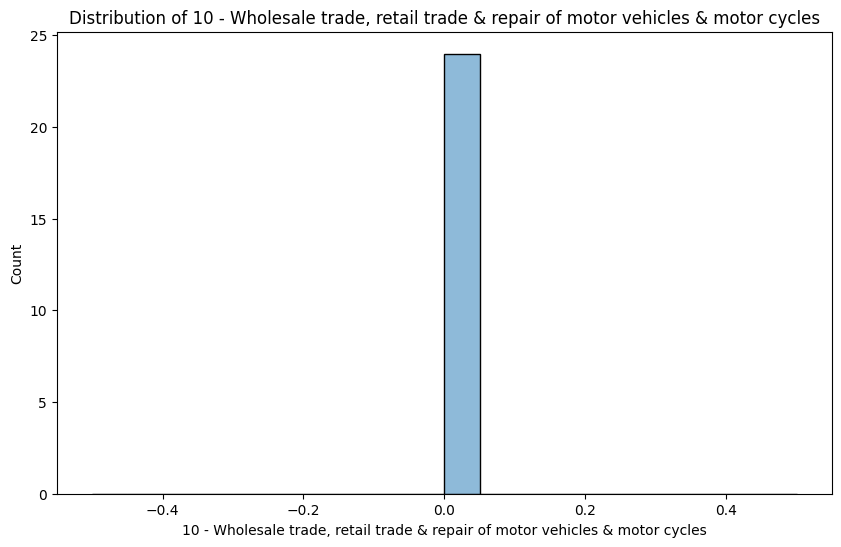

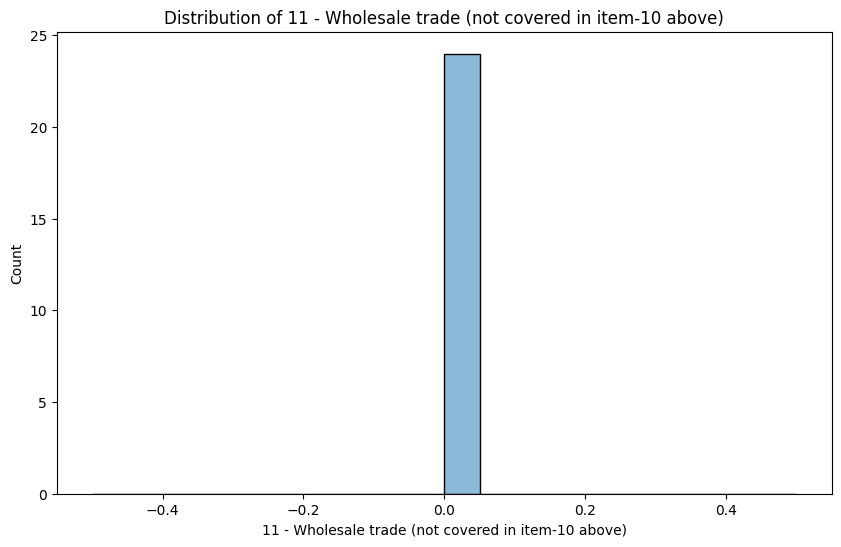

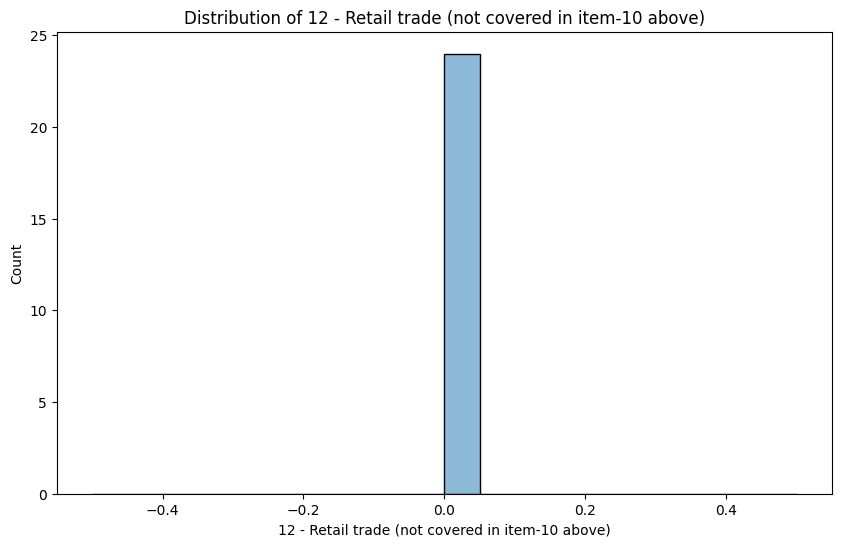

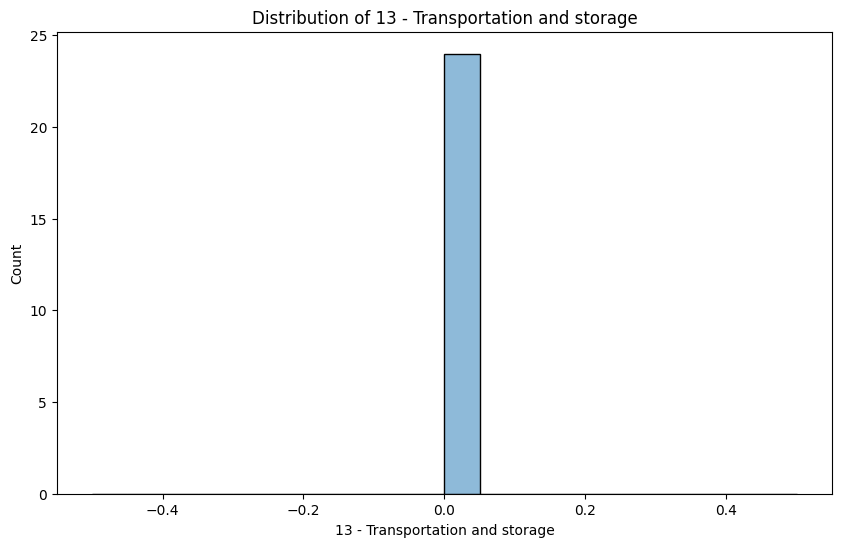

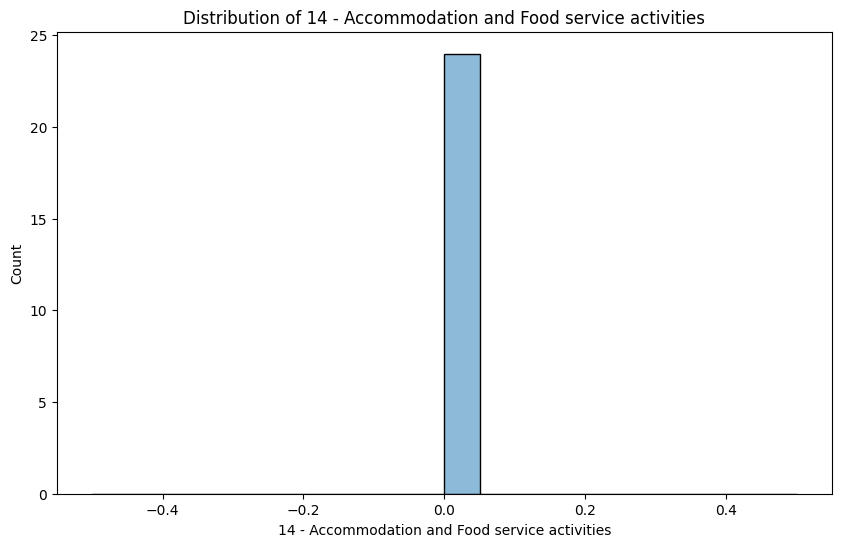

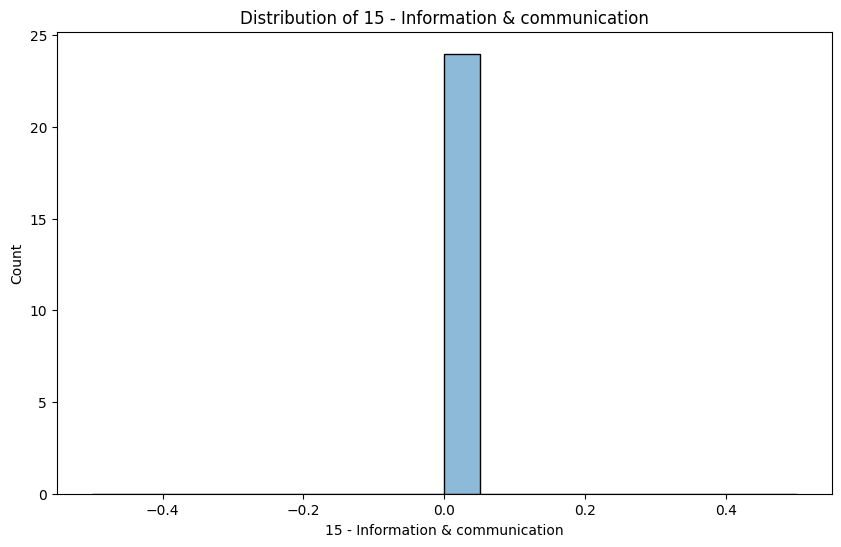

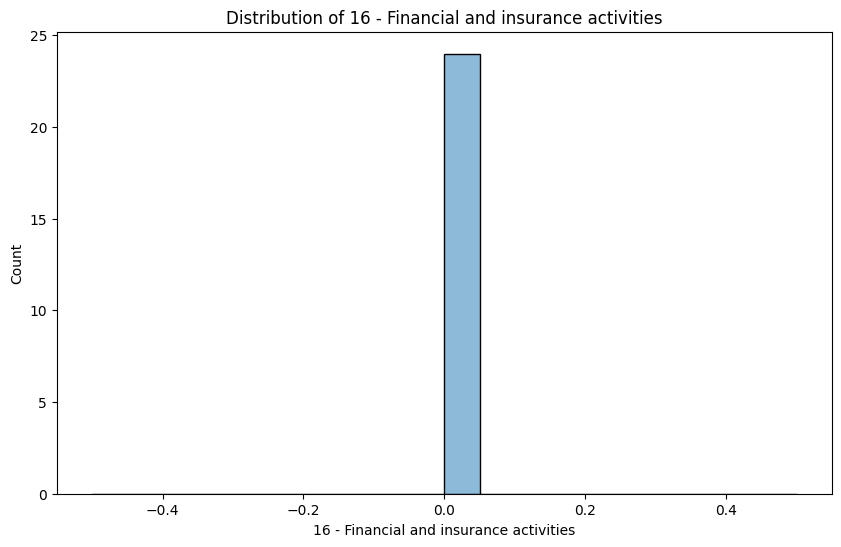

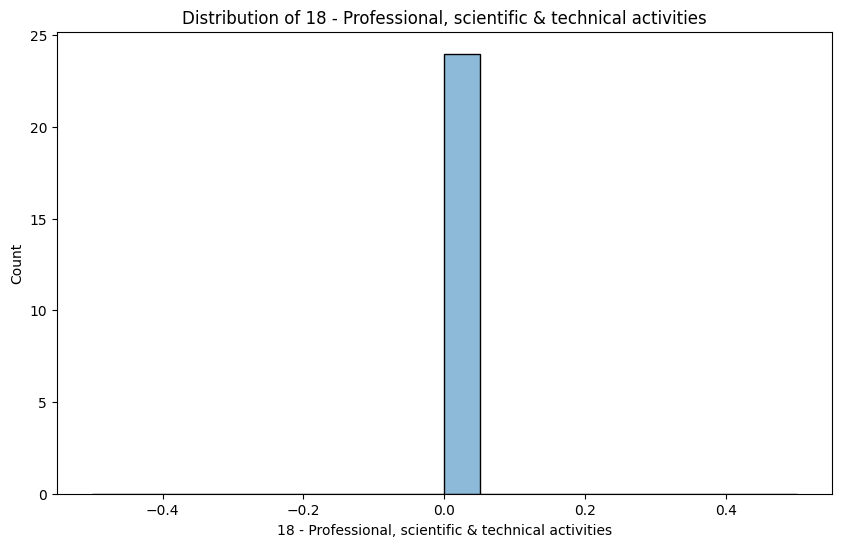

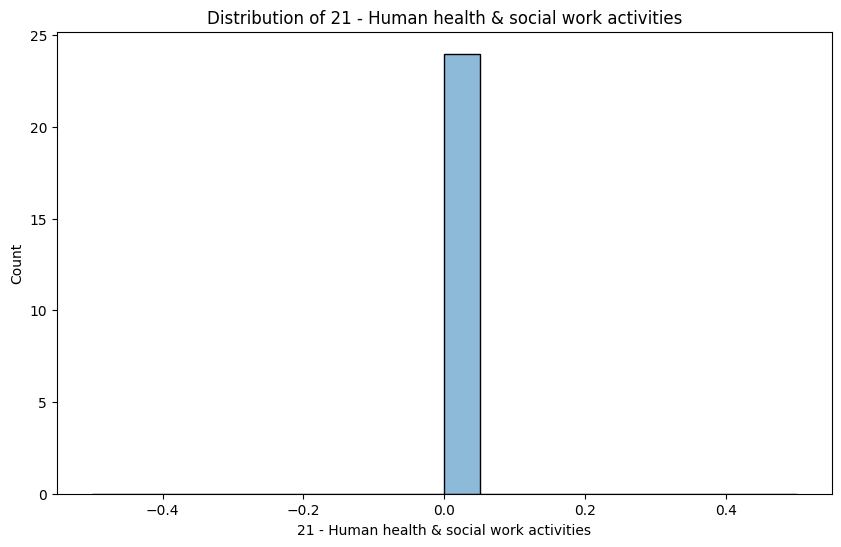

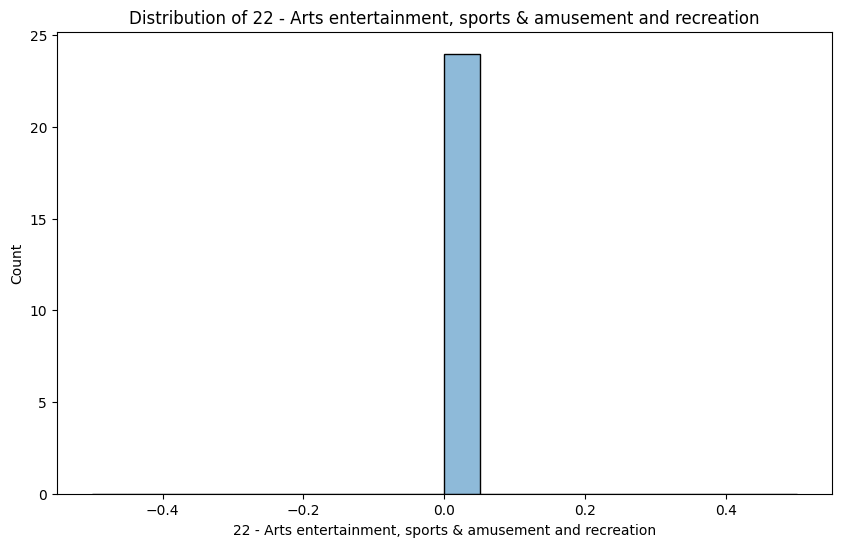

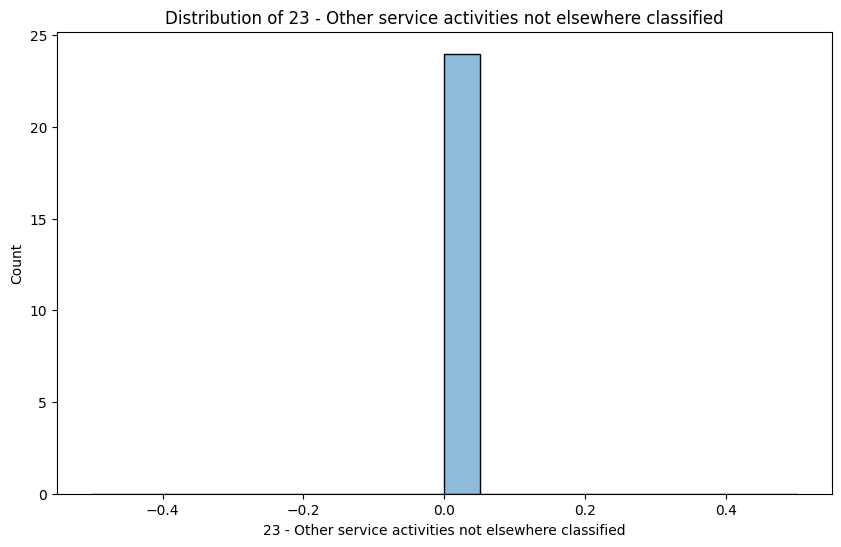

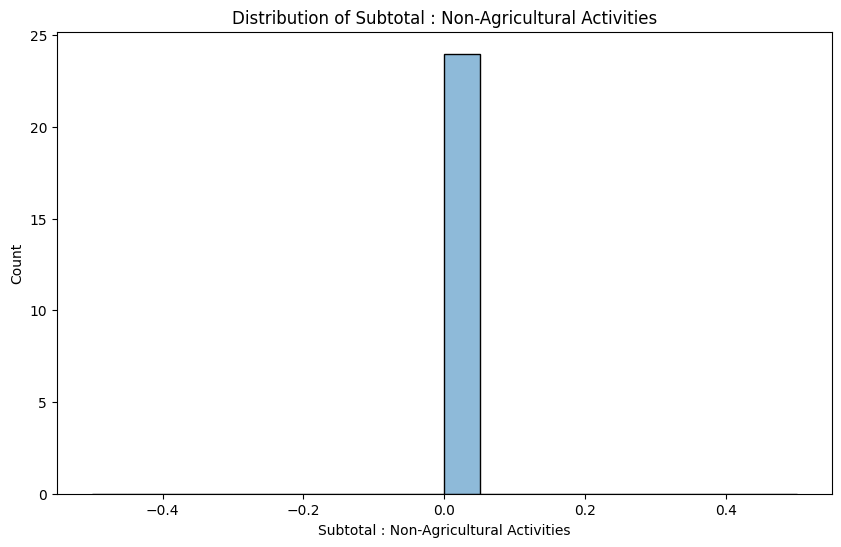

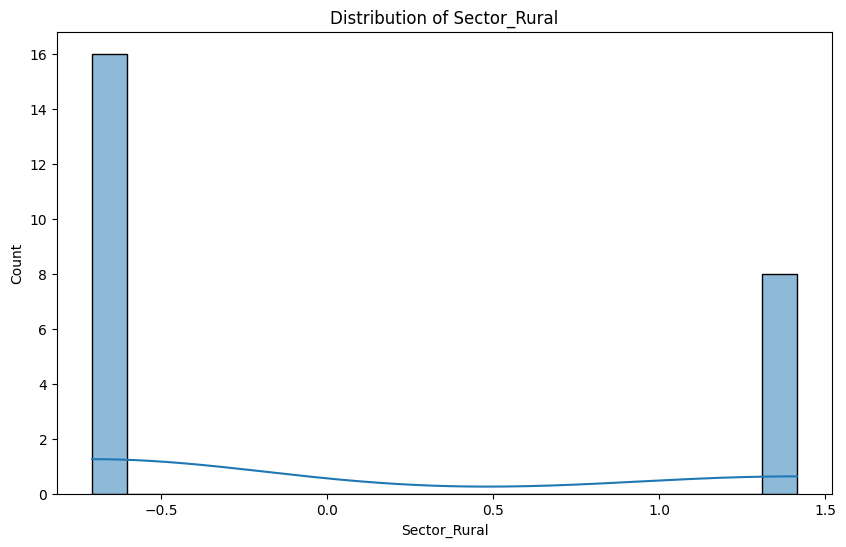

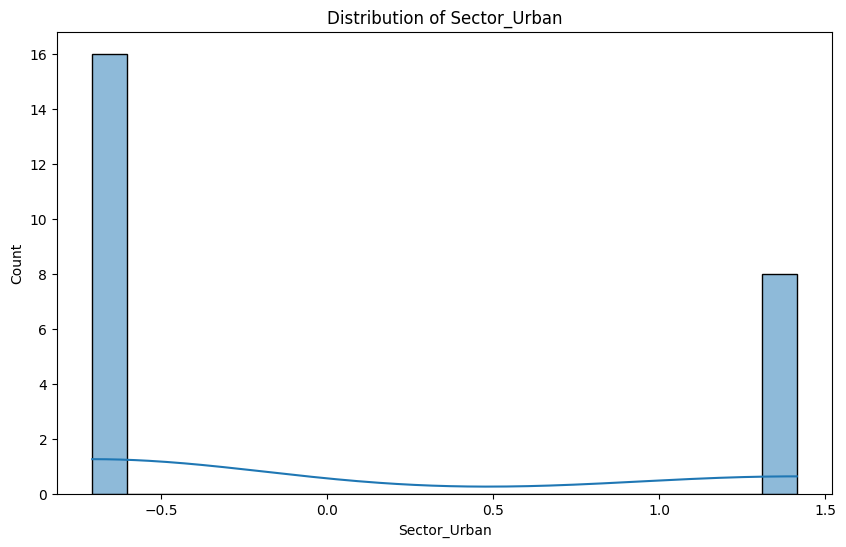

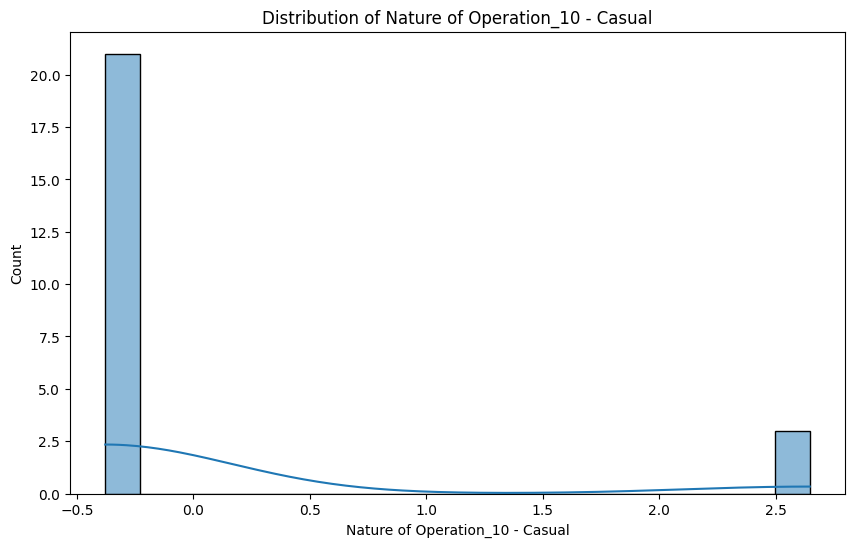

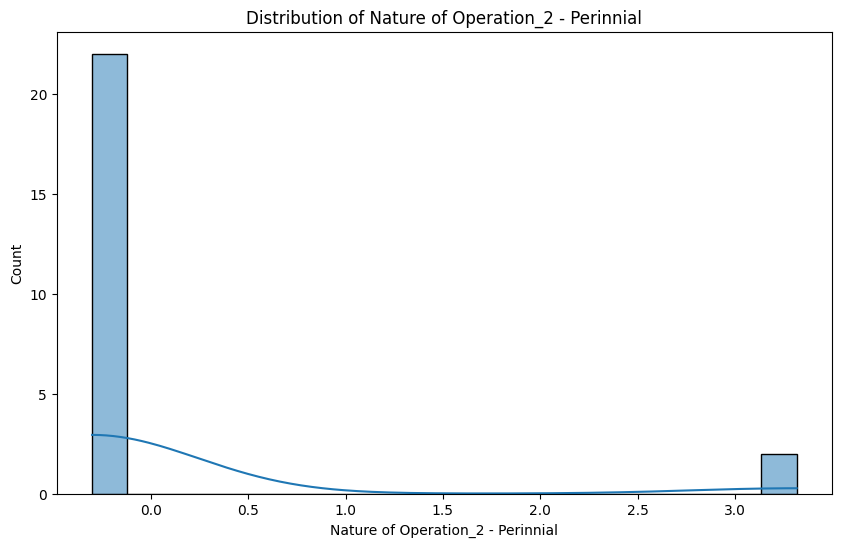

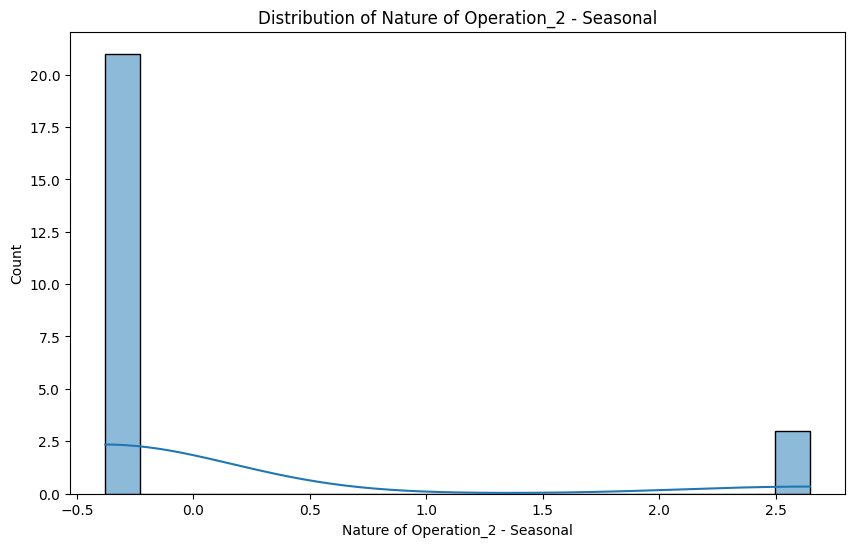

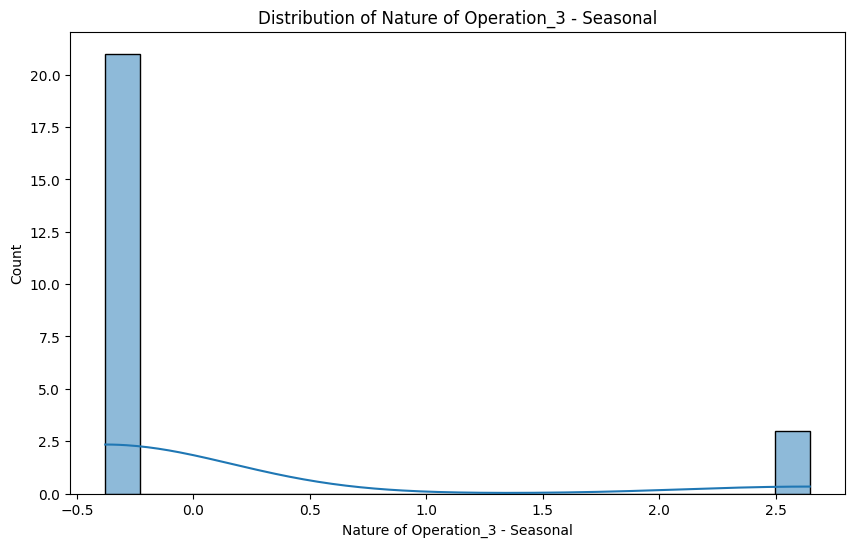

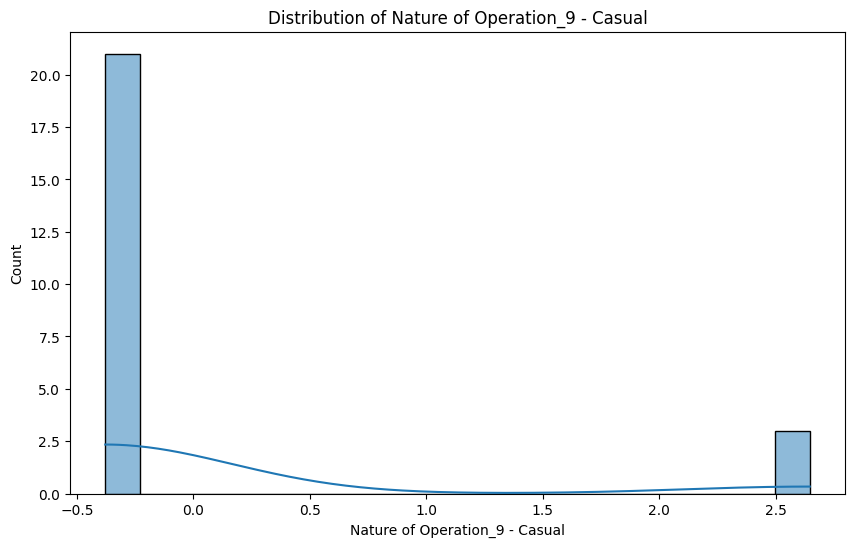

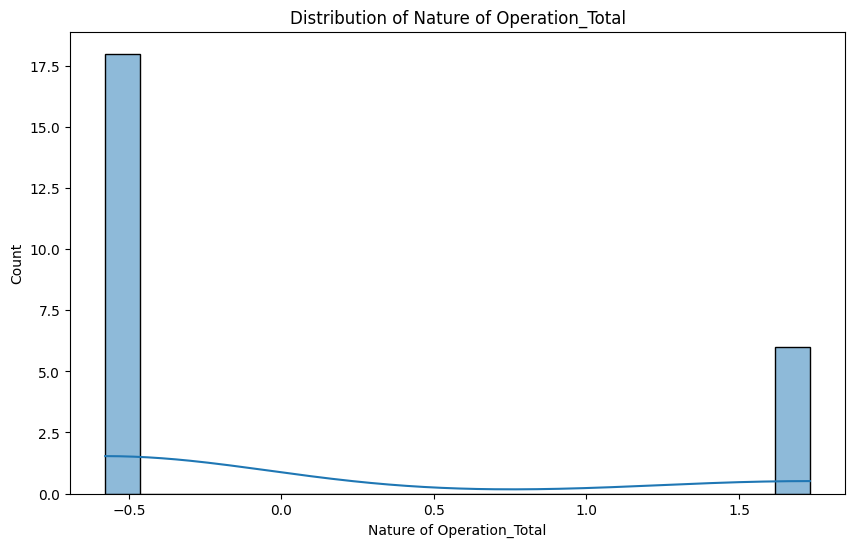

In [21]:
for column in features.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(features[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

**Bivariate Analysis**

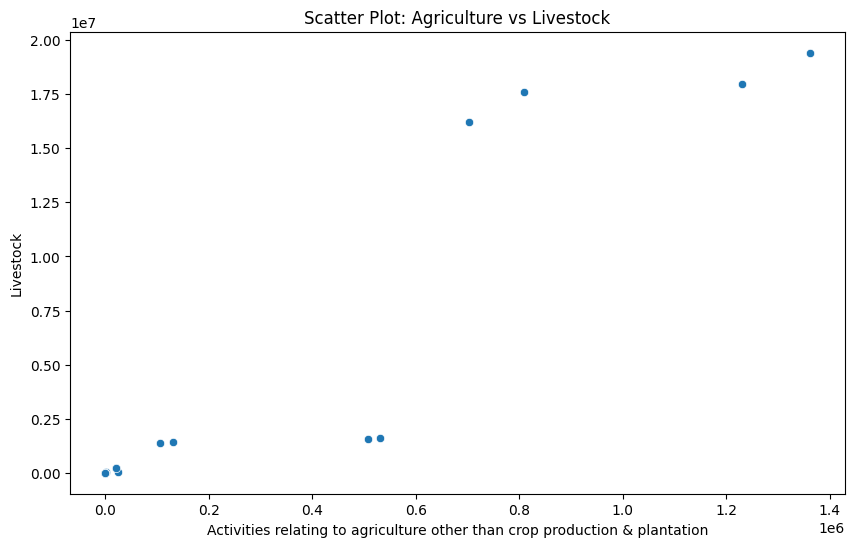

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='01 - Activities relating to agriculture other than crop production & plantation',
                y='02 - Livestock', data=data)
plt.title('Scatter Plot: Agriculture vs Livestock')
plt.xlabel('Activities relating to agriculture other than crop production & plantation')
plt.ylabel('Livestock')
plt.show()

**Multivarite Analysis**

*Correlation matrix*

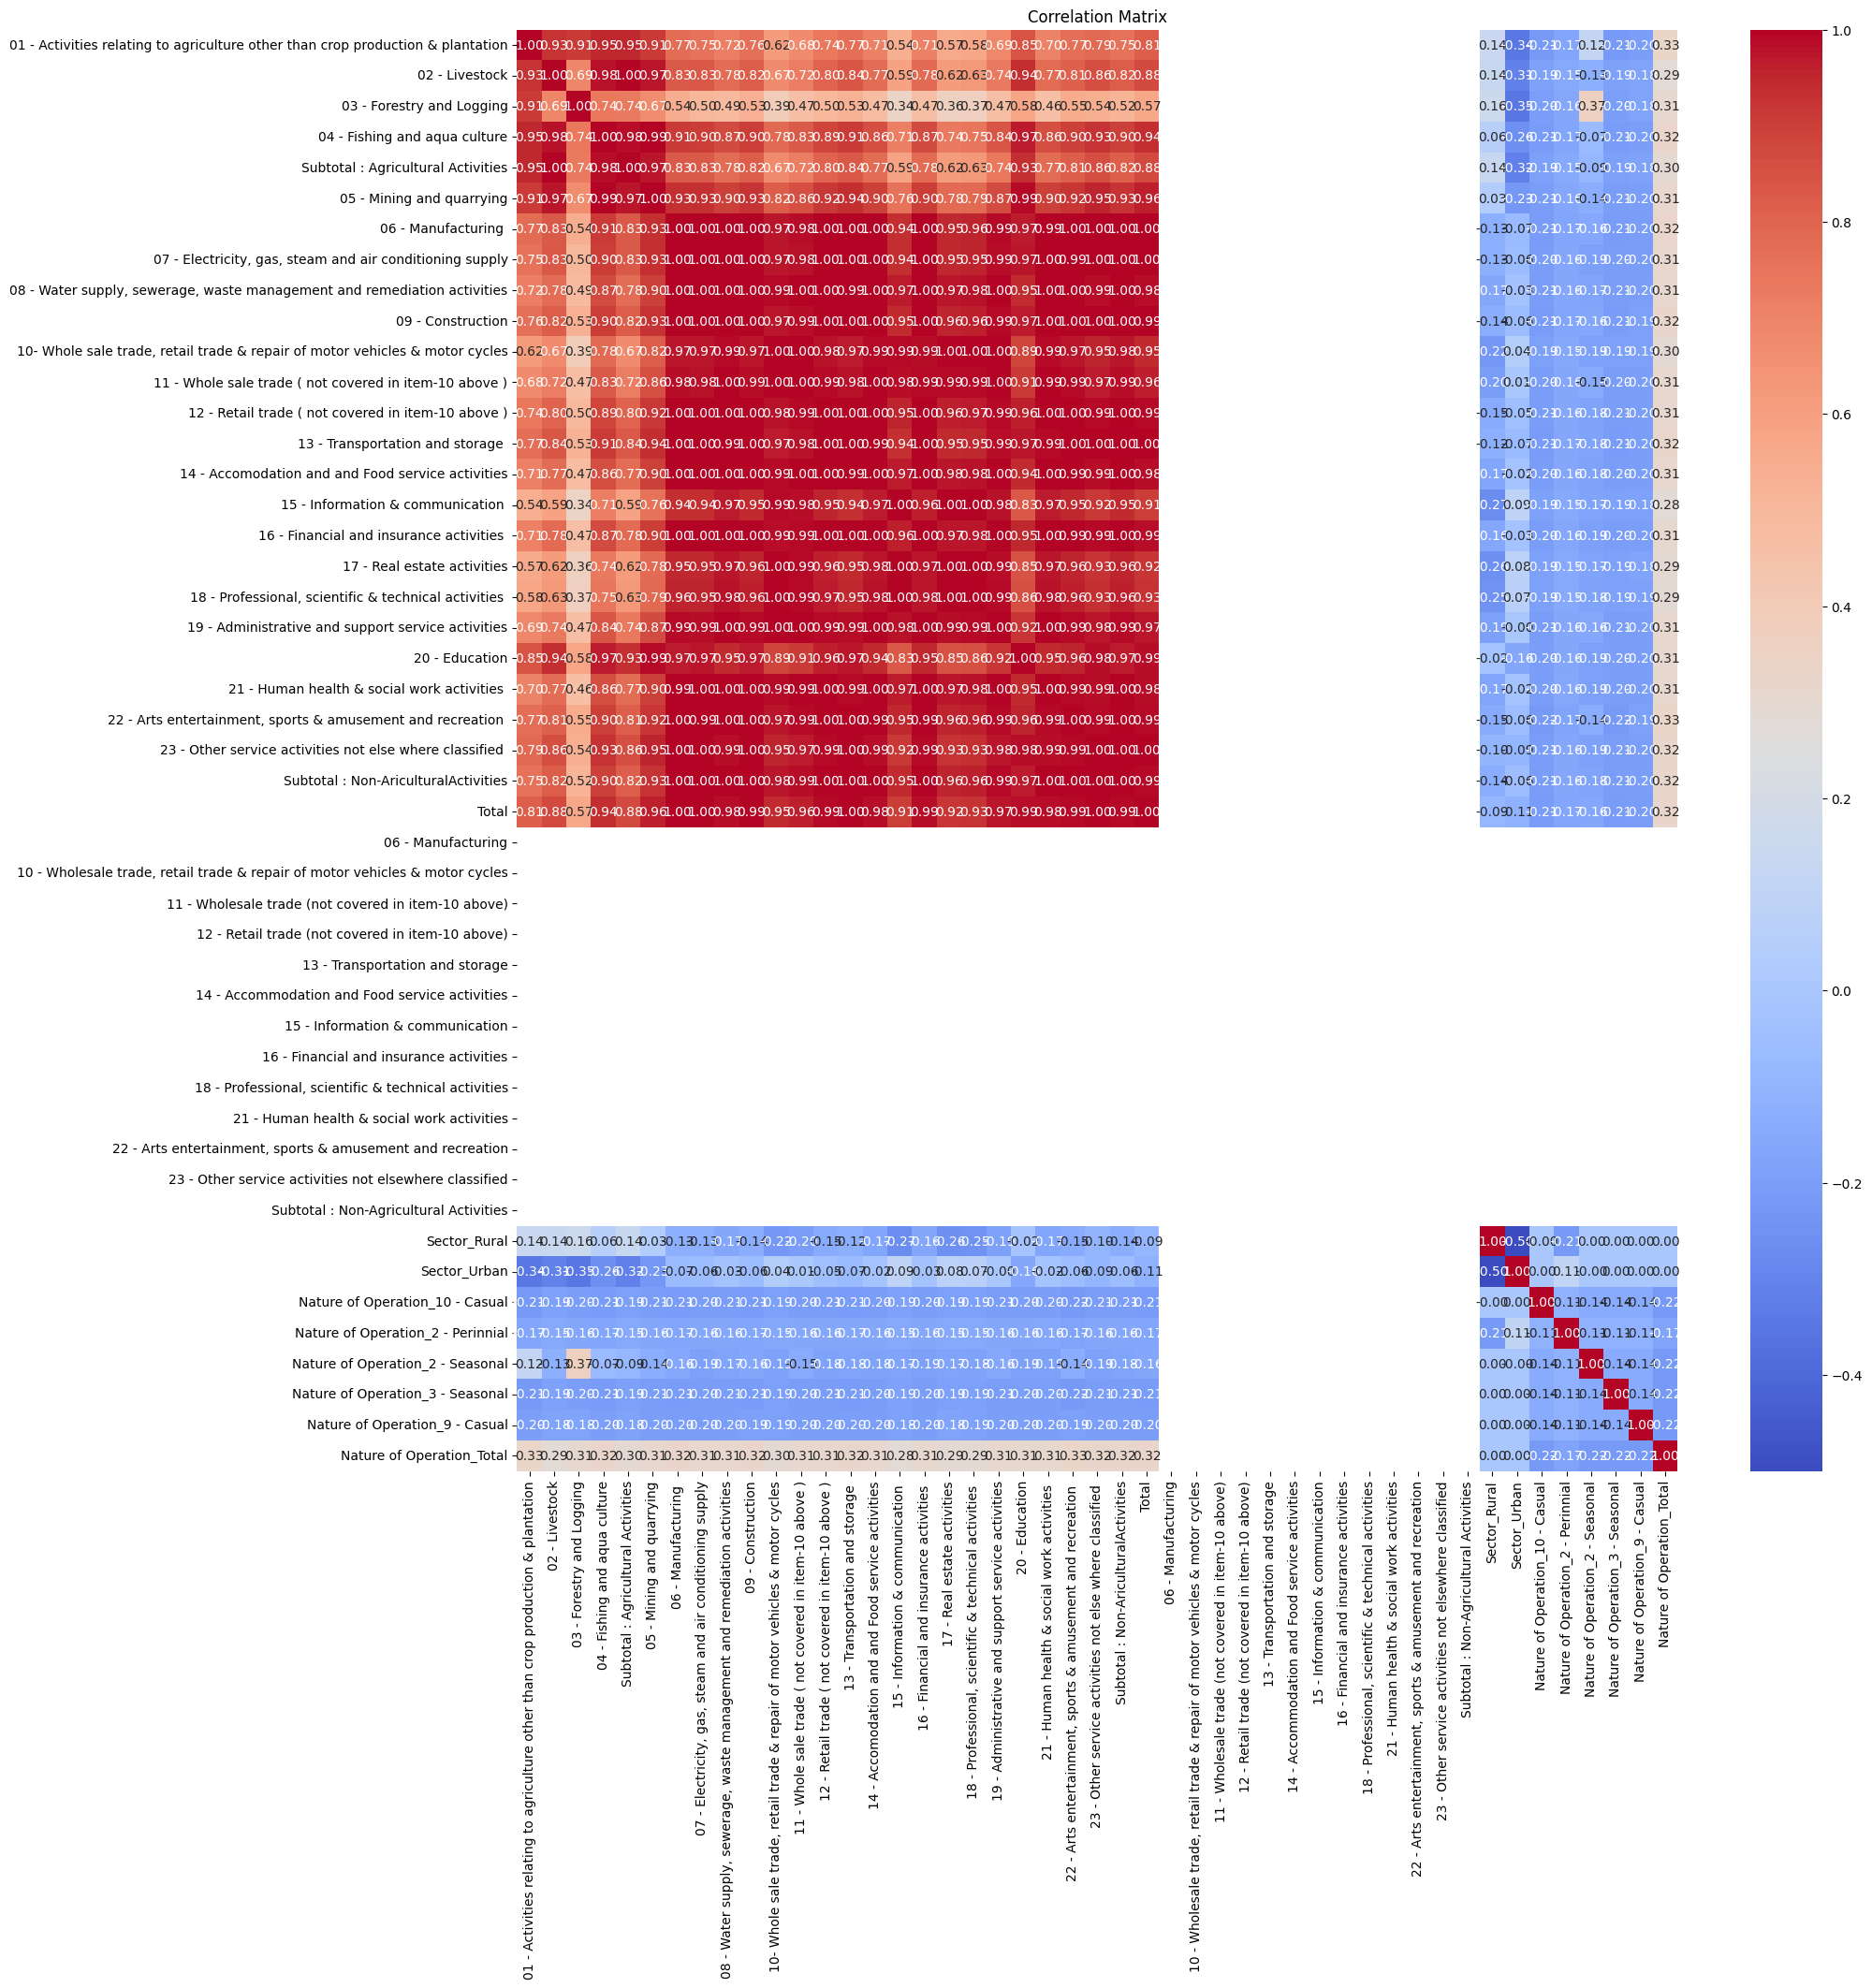

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Baseline Model**

*Split the data*

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

*Train a Linear Regression model*

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

* Predict on test set*

In [28]:
y_pred = model.predict(X_test)

* Evaluate the model*

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Linear Regression Mean Absolute Error: {mae}')
print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared: {r2}')

Linear Regression Mean Absolute Error: 50452.164144772294
Linear Regression Mean Squared Error: 3563431481.1413217
Linear Regression R-squared: 0.9999982061520049


**Model Evaluation and Regularization**

*Train on the training set*

In [31]:
y_train_pred = model.predict(X_train)

*Training set performance*

In [32]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [33]:
print(f'Training Mean Absolute Error: {mae_train}')
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training R-squared: {r2_train}')

Training Mean Absolute Error: 2.0293028462304327e-08
Training Mean Squared Error: 9.382626120169192e-16
Training R-squared: 1.0


**Ridge Regression**

In [34]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f'Ridge Regression R-squared: {r2_score(y_test, y_pred_ridge)}')

Ridge Regression R-squared: 0.9973355922127761


**Lasso Regression**

In [35]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print(f'Lasso Regression R-squared: {r2_score(y_test, y_pred_lasso)}')

Lasso Regression R-squared: 0.9983651662108121
